# Calculating US Population Structure by Year

Here, I'll be processing the structure of the US population based on Social Security Administration actuarial tables, from https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html which is a study from 2005. Should be quite accurate for past values, and we'll see what future values are like. They talk about some of the differences from estimates that the CDC and Census Bureau make, typically because of different assumptions about human life expectancy. Variable names are [described here](https://www.ssa.gov/OACT/NOTES/as120/LifeTables_Body.html#wp1168594). I'll be focusing on cohort life tables, since they more effectively take changes over time into account.

Another source at https://www.cdc.gov/nchs/products/life_tables.htm provides the core dataset that was used to calculate the Social Security Administration tables. The Social Security calculations differ in several assumptions, such as not assuming you automatically die at 100. That's not an exaggeration, the "probability of death between x and x+1 years" after 100 on all the NCHS charts is just a flat 1.00. It's not totally unreasonable, since the data set for people living over 100 is small, but there are nearly 100,000 Americans over 100 [as of 2014](https://www.cdc.gov/nchs/products/databriefs/db233.htm) and going up, at least pre-COVID. 

Base methods: Downloaded the table pages from the website, and manually copied the table into Excel files. With so few tables, it wasn't worth automating. Output: several Pandas DataFrames, each with the estimated number of people alive from X year of birth in Y current year. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yearlist = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

lifelist = []

#Load files for the cohort data:
for year in yearlist:
    templife = pd.read_excel('Table_7_'+str(year)+'.xlsx')
    lifelist.append(templife)
    
#Repeat for the period data:
lifelist_p = []
for year in yearlist:
    templife = pd.read_excel('Table_6_'+str(year)+'.xlsx')
    lifelist_p.append(templife)

In [3]:
life_M_df = pd.DataFrame()
life_F_df = pd.DataFrame()

life_M_p_df = pd.DataFrame()
life_F_p_df = pd.DataFrame()

#(not efficiently concatenated, but whole file takes like 10 seconds)

for templist,year in zip(lifelist,yearlist):
    #print(year)
    subdf = pd.DataFrame()
    subdf[year] = templist.iloc[3:,2]
    subdf = subdf.dropna().reset_index()
    subdf = subdf.drop('index', axis=1)
    
    life_M_df = pd.concat([life_M_df,subdf], axis=1)
    
    subdf = pd.DataFrame()
    subdf[year] = templist.iloc[3:,10]
    subdf = subdf.dropna().reset_index()
    subdf = subdf.drop('index', axis=1)
    
    life_F_df = pd.concat([life_F_df,subdf], axis=1)
    
print('')
for templist,year in zip(lifelist_p,yearlist):
    #print(year)
    subdf = pd.DataFrame()
    subdf[year] = templist.iloc[3:,2]
    subdf = subdf.dropna().reset_index()
    subdf = subdf.drop('index', axis=1)
    
    life_M_p_df = pd.concat([life_M_p_df,subdf], axis=1)
    
    subdf = pd.DataFrame()
    subdf[year] = templist.iloc[3:,10]
    subdf = subdf.dropna().reset_index()
    subdf = subdf.drop('index', axis=1)
    
    life_F_p_df = pd.concat([life_F_p_df,subdf], axis=1)

1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020

1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020


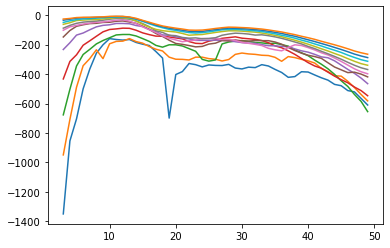

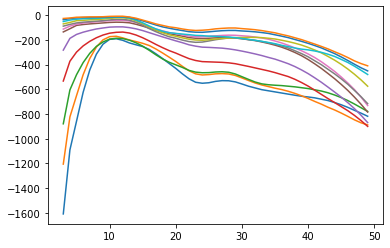

In [22]:
for i in range(1900,2020,10):
    plt.plot(life_M_df[i].diff()[3:50])
plt.show()
for i in range(1900,2020,10):
    plt.plot(life_M_p_df[i].diff()[3:50])
plt.show()

In [ ]:
# for i in range(1900,2020):
#     #If the index isn't one of the decade marks:
#     if i%10:
#         i_tgts = [10*np.floor(i/10), 10*np.ceil(i/10)]
#         #Manually interpolate for each row:
#         life_F_df[i] = (1-0.1*(i%10))*life_F_df[i_tgts[0]] + 0.1*(i%10)*life_F_df[i_tgts[1]]
#         life_M_df[i] = (1-0.1*(i%10))*life_M_df[i_tgts[0]] + 0.1*(i%10)*life_M_df[i_tgts[1]]
#         life_F_p_df[i] = (1-0.1*(i%10))*life_F_p_df[i_tgts[0]] + 0.1*(i%10)*life_F_p_df[i_tgts[1]]
#         life_M_p_df[i] = (1-0.1*(i%10))*life_M_p_df[i_tgts[0]] + 0.1*(i%10)*life_M_p_df[i_tgts[1]]


lifemat_F = np.zeros([2020-1900,120])
lifemat_M = np.zeros([2020-1900,120])

#Interpolating by row, like in the commented version above, is likely to
#lose cohort information. 

#We care about period and cohort information. Period data gives us how
#many people of a given age died in a given year, roughly, but cohort gives
#us how many people born in a given year will make it to a given age. We 
#can use the period data to scale our cohort estimates for the non-decade
#years, on the assumption that the change in the period data from year 0 to
#year 10 gives us a useful representation of the deaths over the preceding 
#decade. The challenge is how to apply it to scale our cohort data!


#Goal of below: Interpolate across individual ages
#    1. Get a structure for the average death shape using the bracketing data,
#       interpolated to the specific year. 
#    2. Scale the death shape to match the starting and ending years for that
#       cohort, i.e. 1910-age 10 and 1920-age 20 for the cohort born in 1900.
for i in range(1900,2020,10):
    baselife_F1 = life_F_df[i]
    baselife_F2 = life_F_df[i+10]
    baselife_M1 = life_M_df[i]
    baselife_M2 = life_M_df[i+10]
    
    scaled_steps_F = baselife_F1
    for j in range(10):
        
        lifemat_F
    
    if i%10:
        i_tgts = [10*np.floor(i/10), 10*np.ceil(i/10)]
        #Manually interpolate for each row:
        life_F_df[i] = (1-0.1*(i%10))*life_F_df[i_tgts[0]] + 0.1*(i%10)*life_F_df[i_tgts[1]]
        life_M_df[i] = (1-0.1*(i%10))*life_M_df[i_tgts[0]] + 0.1*(i%10)*life_M_df[i_tgts[1]]
        life_F_p_df[i] = (1-0.1*(i%10))*life_F_p_df[i_tgts[0]] + 0.1*(i%10)*life_F_p_df[i_tgts[1]]
        life_M_p_df[i] = (1-0.1*(i%10))*life_M_p_df[i_tgts[0]] + 0.1*(i%10)*life_M_p_df[i_tgts[1]]

        #No "else", don't do anything, even-modulo means decade year, so it's already fully assigned.
        
        

life_F_df = life_F_df.T.sort_index()
life_M_df = life_M_df.T.sort_index()
life_F_p_df = life_F_p_df.T.sort_index()
life_M_p_df = life_M_p_df.T.sort_index()

In [ ]:
life_F_p_df

In [ ]:
pd.to_pickle(life_F_df, 'life_F_df.pkl')
pd.to_pickle(life_M_df, 'life_M_df.pkl')

pd.to_pickle(life_F_p_df, 'life_F_p_df.pkl')
pd.to_pickle(life_M_p_df, 'life_M_p_df.pkl')